# Bank Loan Data Analysis

#### By: Karan Agarwal

## Section 1: Problem Statement and Scope

### 1.1 Problem Statement

The objective of this project is to analyze bank loan application data to understand the key factors influencing loan approval decisions.

⟫⟫ Banks and financial institutions face significant challenges in:

• Assessing applicant creditworthiness

• Reducing approval risk

• Making consistent, data-driven lending decisions

⟫⟫ Using historical loan application data, this analysis aims to uncover patterns and trends related to:

• Customer demographics

• Income and employment characteristics

• Loan attributes

• Credit history

⟫⟫ The insights derived from this analysis can help banks improve:

• Credit evaluation processes

• Applicant screening strategies

• Loan approval policies

### 1.2 Business Objectives

The key business questions this project aims to answer are:

⟫ Which applicant attributes are most associated with loan approval or rejection?

⟫ How do income levels, loan amount, and loan term influence approval outcomes?

⟫ Are certain employment types or education levels more likely to be approved?

⟫ What role does credit history play in loan approval decisions?

⟫ Can we identify high-risk and low-risk applicant profiles based on historical data?

### 1.3 Scope of the Analysis

✔ Exploratory Data Analysis (EDA)

✔ Data cleaning and preprocessing

✔ Univariate and bivariate analysis

✔ Identification of trends and correlations

✔ Business-oriented insights and recommendations

### 1.4 Dataset Description

The dataset contains historical loan application records with features related to:

• Applicant demographics (gender, marital status, education, employment)

• Financial information (applicant income, co-applicant income)

• Loan details (loan amount, loan term, property area)

• Credit history

• Loan outcome (approved or rejected)

### 1.5 Target Audience

This analysis is intended for:

• Bank risk analysts

• Credit policy and underwriting teams

• Business stakeholders

• Aspiring data analysts reviewing the project portfolio

### 1.6 Key Deliverables

• Cleaned and well-documented dataset

• Insightful visualizations

• Clear business interpretations

• Actionable recommendations

## Section 2: Data Understanding and Basic Metrics

### 2.1 Importing All the required Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### 2.2 Loading the Dataset and Displaying top 5 rows

In [8]:
df = pd.read_csv(r"C:\Users\karan\Downloads\Bank Loan Data Analysis.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2.3 Shape of the Dataset

In [10]:
df.shape

(614, 13)

#### Interpretation:
The dataset contains 614 loan applications (rows) and 13 attributes (columns).
Each row corresponds to a single loan application, capturing applicant demographics, financial details, and loan status.

### 2.4 Datatypes and General Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Interpretation:

The dataset consists of 13 columns, of which 8 are categorical and 5 are numerical.

Columns such as Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property_Area, and Loan_Status contain no missing values, while the remaining columns have varying degrees of missing data.

The dataset occupies minimal memory, indicating efficient storage and suitability for in-memory analysis.

### 2.5 Column Names

In [16]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

#### Observation:
The dataset contains the following columns: ['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

### 2.6 Missing Value Detection

In [19]:
df.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

#### Interpretation:
Missing values are observed in 6 columns, with Credit_History having the highest number of missing values (50).

Columns such as Self_Employed and LoanAmount contain a moderate number of missing values, while Dependents, Loan_Amount_Term, Gender, and Married have relatively few missing entries.

These missing values will be handled in subsequent stages based on business relevance and statistical appropriateness.

### 2.7 Statistical Summary ( Numerical Columns )

In [22]:
df.describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


#### Interpretation:
• **Average Income** of an applicant and co-applicant is calculated as 5403 and 1621 respectively, whereas the **standard deviation** for the same is 6109 and 2926 respectively, which shows a high variation in the income level of applicants and their co-applicants. 

• The income of an applicant is found to be as low as 150 and as high as 81000, indicating extreme outliers present in the dataset. 

• The average **loan amount** is approximately 146, with values ranging from 9 to 700, indicating significant variability and the presence of high-value loans.

• The **loan term** is heavily concentrated around 360 months, as indicated by the median and 75th percentile both being 360, suggesting standardized loan durations.

• The **Credit_History** variable is binary and highly skewed toward 1, indicating that most applicants have a positive credit history.

### 2.8 Value Counts Category Wise

In [25]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    print(f"\n Value Counts for {col}: ")
    print(df[col].value_counts())


 Value Counts for Gender: 
Gender
Male      489
Female    112
Name: count, dtype: int64

 Value Counts for Married: 
Married
Yes    398
No     213
Name: count, dtype: int64

 Value Counts for Education: 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

 Value Counts for Self_Employed: 
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

 Value Counts for Property_Area: 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

 Value Counts for Loan_Status: 
Loan_Status
Y    422
N    192
Name: count, dtype: int64


#### Observation:
↠ The **gender distribution** is highly biased toward male with majority of 489 male in contrast to 112 females. This shows, the majority of the applicant for the loans are male only. 

↠ There are almost double **married applicants** present in the dataset against the single applicants. It shows that need for the loan arises more after the marriage.

↠ There are 480 **Graduates** against the 134 non-graduates, indicates good education level among the loan applicants. 

↠ The majority of applicants (500 out of 582) are **not self-employed**, indicating that salaried individuals form the primary applicant base.

↠ Applicants mainly belong to three sort of areas: Semi-urban, Urban and Rural. With 233 applicants, **Semi urban** dominates the dataset.

↠ Total of 422 loan applications are approved, while 192 are rejected, indicating a relatively **high approval rate**.

#### Final Interpretation:
*In Section 2, I performed data understanding by examining dataset structure, data types, missing values, statistical distributions, and categorical frequencies. This helped me identify data quality issues, variable distributions, and the loan approval outcome, laying a strong foundation for exploratory analysis.*

## Step 3: Data Cleaning

### 3.1 Duplicated Rows

In [30]:
df.duplicated().sum()

0

#### Observation:
No duplicate rows were found in the dataset. This confirms that each row represents a unique loan applicant, and no deduplication is required.  

### 3.2 Unique values in each column

In [33]:
df.nunique().sort_values(ascending= False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

#### Observation:
##### Identifier:
The Loan_ID column has exactly 614 unique values, confirming every loan application is uniquely represented. 

##### Numerical Behavioral Columns:
Applicant Income, Coapplicant Income and Loan Amount have huge variety in the values, showing diversity in the dataset. 

##### Categorical Variables:
Property_Area has three categories - Rural/Urban/Semi-Urban.
Gender has two categories - Male/Female.
Education has also two categories - Graduate/Non-Graduate
Other categorical variables such as Married, Self_Employed, Credit_History and Loan_Status have two categories - Yes/No.

##### Special Variables:
Loan_Amount_Term has exactly ten values representing 10 different Loan terms.
Dependents has 4 values showing that values might be 0, 1, 2 and 3.

### 3.3 Handling Null Values

In [36]:
# 1. Handling Credit_History (special case)
df['Credit_History'] = df['Credit_History'].replace({1.0: 'Yes', 0.0: 'No'})
df['Credit_History'] = df['Credit_History'].fillna('Not Available')

# 2. Handling other categorical variables
categorical_cols = ['Gender', 'Married', 'Self_Employed', 'Dependents']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Handling numerical variables  
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# 4. Verifying cleaning
print("Missing values after cleaning: \n")
print(df.isnull().sum())

Missing values after cleaning: 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#### Observation:
Missing values in categorical variables were imputed using the mode to preserve category distributions, while numerical variables were imputed using the median to reduce the influence of outliers.

However, the column 'Credit_History' variable represents a critical risk indicator for loan approval decisions. Instead of imputing missing values using statistical measures such as mode or median, missing entries were treated as a separate category to avoid introducing bias and to preserve the uncertainty associated with first-time or unreported credit behavior.

## Step 4: Univariate Analysis

### 4.1 Income Distribution

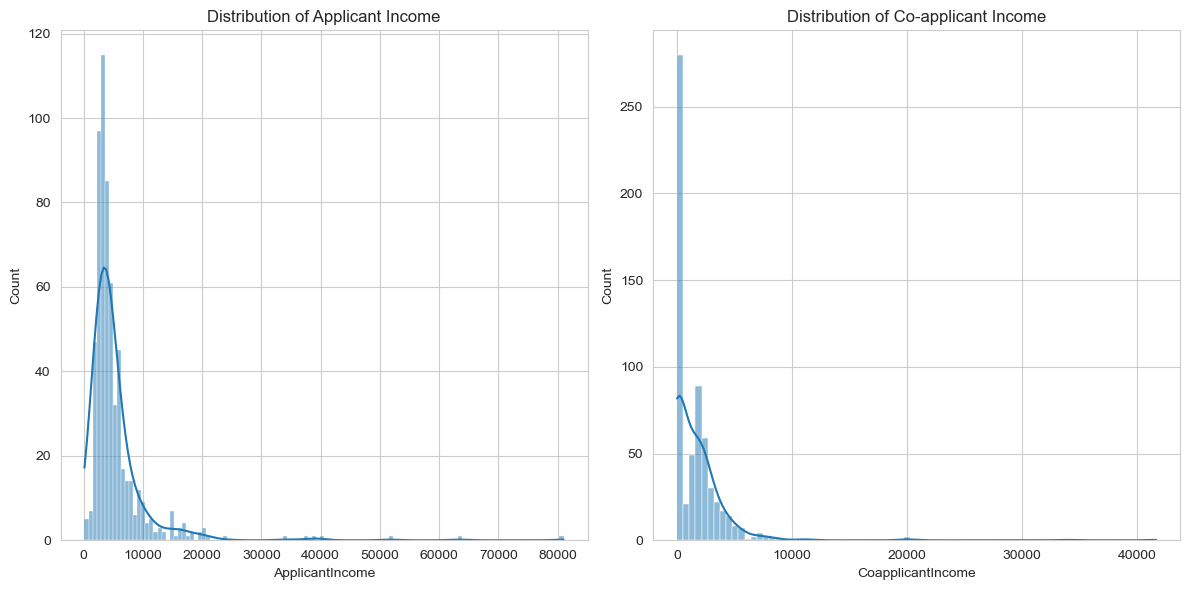

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Applicant Income')

sns.histplot(data=df, x='CoapplicantIncome', kde= True, ax=axes[1])
axes[1].set_title('Distribution of Co-applicant Income')

plt.tight_layout()
plt.show()

#### Observation:
The Histogram for applicant's income is skewed extremely towards right and shows that there are extreme outliers present in the income level of applicants. Most of the income values lie between 0 to 15000 bucket.

Similarly, the histogram for co-applicant's income is right-skewed extremely and shows that there are extreme outliers present in the income level of co-applicants also. Most of the income values of co-applicants fall in the bucket from 0 to 6000.

### 4.2 Categorical Variable Distributions

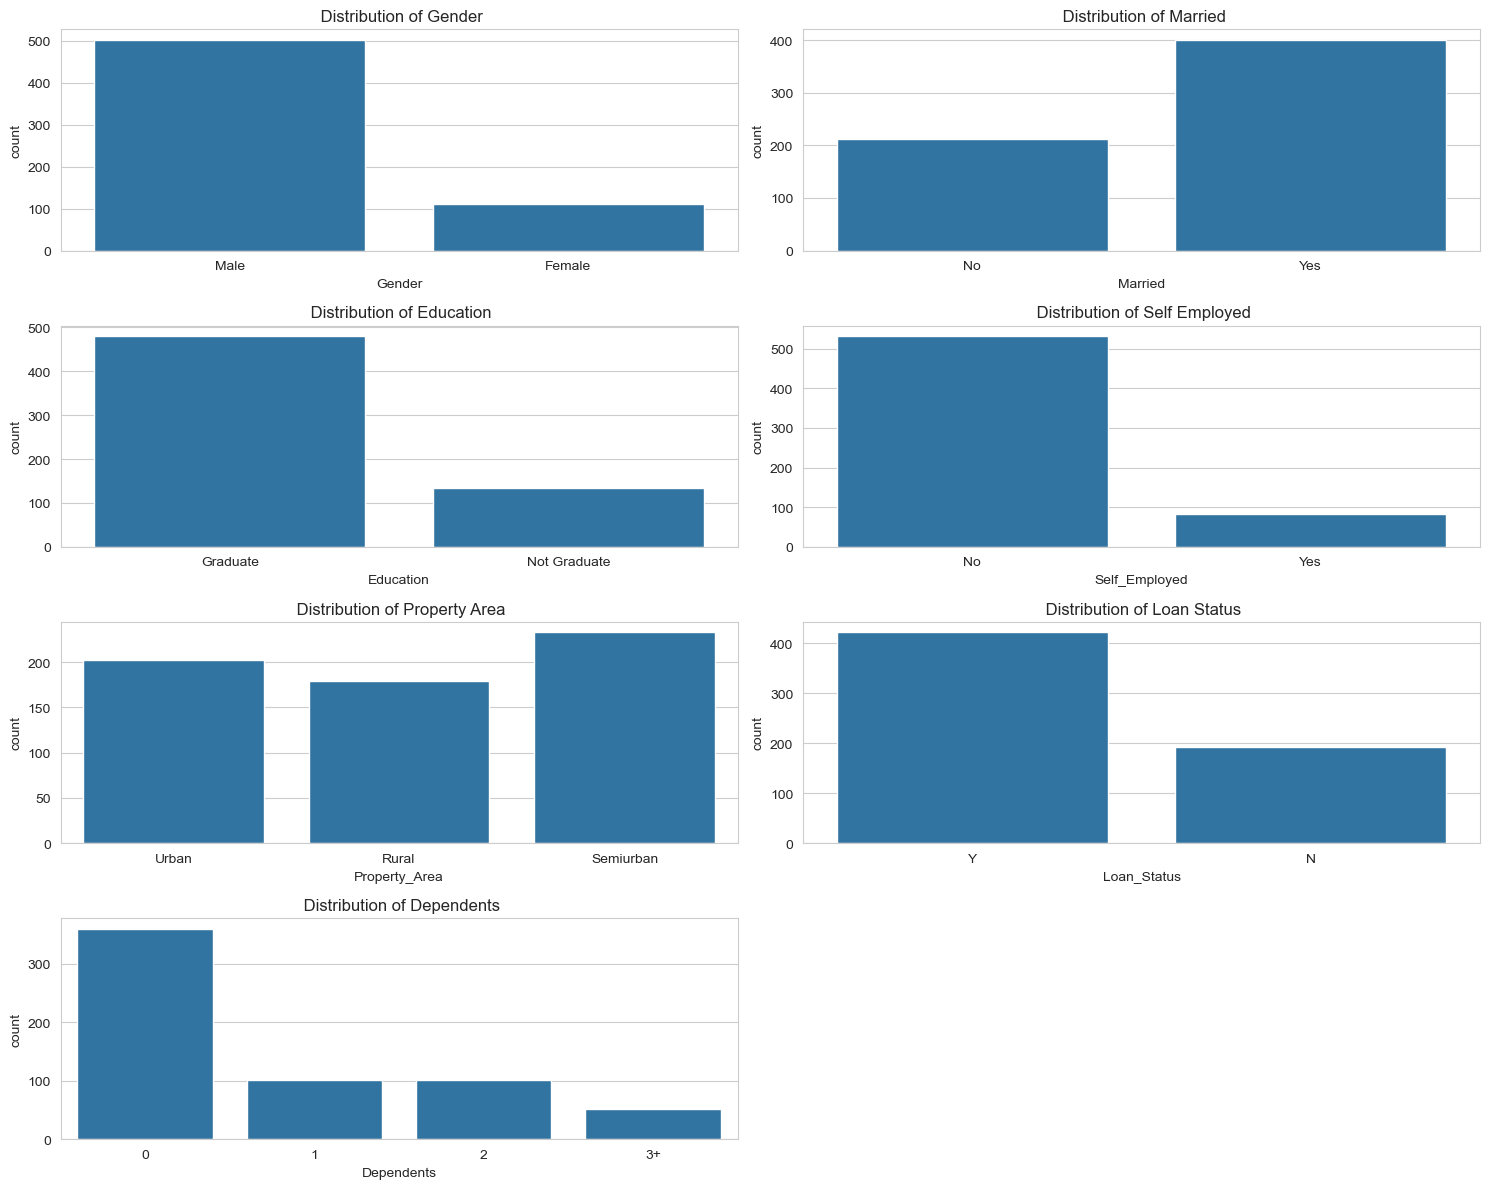

In [43]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']

plt.figure(figsize=(15,12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4,2,i)
    sns.countplot(data= df, x=col)
    plt.title(f" Distribution of {col.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()

#### Observation:
##### 1. Distribution of Gender:
The distribution of gender is highly biased towards male. The number of male applicants are almost five times of the female applicants.

##### 2. Distribution of Marital Status of applicants:
The distribution of marital status of the applicants is biased towards the married applicants, which is almost double to non-married applicants.

##### 3. Distribution of Education Status:
The distribution of education status of the applicant is biased towards the Graduates, which is almost four times of the non-graduates. This indicates that the dataset contains a higher proportion of graduate applicants.

##### 4. Distribution of Employment Status:
The distribution of employment status of the applicant is biased towards the salaried applicants, which shows that the majority of applicants are salaried individuals, indicating a dominance of non–self-employed applicants in the dataset.

##### 5. Distribution of Property Area:
This column is divided almost equally into three parts; Urban, Rural and the Semi-urban, which is slighly biased towards the semi urban applicants. 

##### 6. Distribution of Loan approval Status:
The distribution of loan approval status is biased towards the approved applications which is more than double than the non-approved applications, depicts a good approval rate of the bank. 

##### 7. Distribution of Number of Dependents:
There are four values given for the number of depentents on the applicant. Out of the four values, '0' clearly dominates the graph with almost 350 values, whereas '1' and '2' are equal and '3+' are few in number.  

### 4.3 Loan Amount Distribution

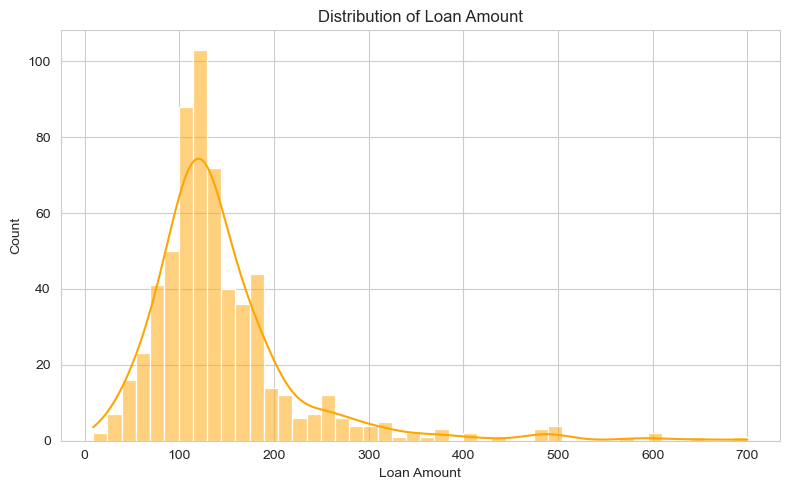

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(data= df, x='LoanAmount', kde= True, color= 'orange')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.tight_layout()
plt.show()

#### Observation:
The histogram is clearly skewed towards the right with most of the values falling between 40 to 200 bucket. This shows that most of the loan disbursed by the bank is of moderate amount. Though, few outliers towards the right tail is also present in the dataset.

### 4.4 Distribution of Loan Amount Terms

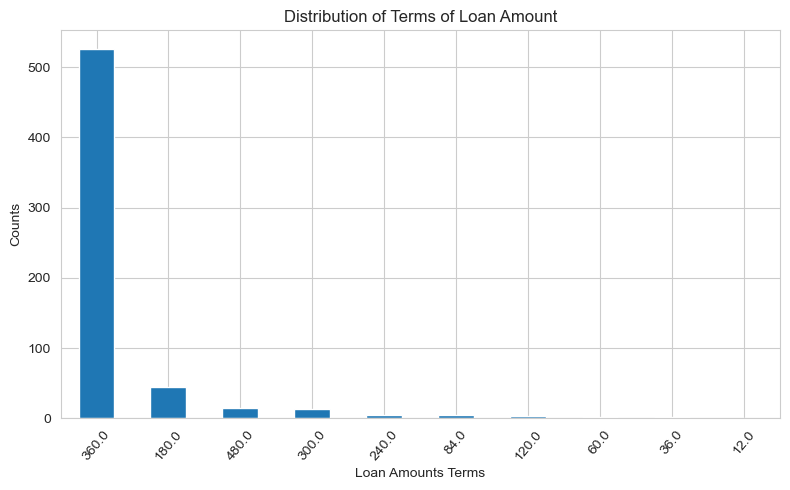

In [49]:
plt.figure(figsize=(8,5))
df['Loan_Amount_Term'].value_counts().plot(kind='bar')
plt.title("Distribution of Terms of Loan Amount")
plt.xlabel("Loan Amounts Terms")
plt.ylabel("Counts")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

#### Observation:
Although, there are 10 distinct terms available for the loan amounts, the most common term is found to be of 360 terms, which dominates the whole segment with almost 550 in number. The other common terms are 180, 480 and 300. This shows that most of the loans are disbursed for a longer period of time.

### 4.5 Distribution of Credit History

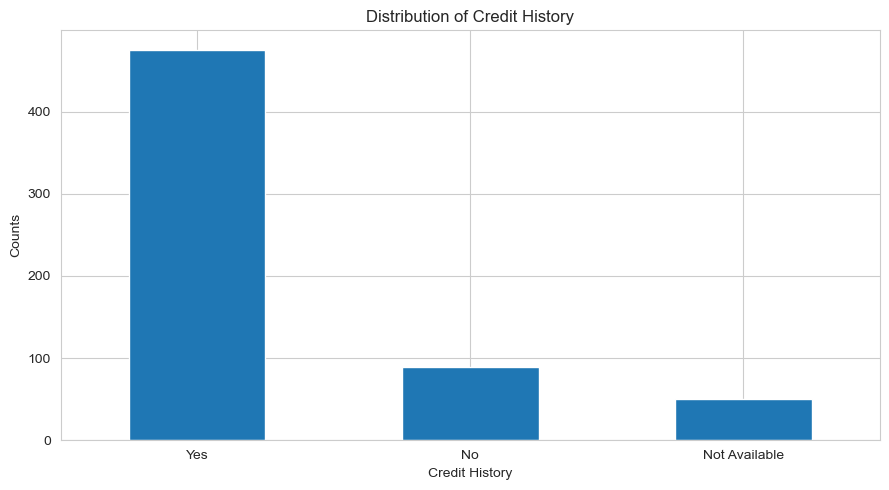

In [52]:
plt.figure(figsize= (9, 5))
df['Credit_History'].value_counts().plot(kind= 'bar')
plt.title("Distribution of Credit History")
plt.xlabel("Credit History")
plt.ylabel("Counts")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#### Observation:
The distribution of credit history shows that the majority of applicants have a positive credit history recorded by the bank.

A smaller segment of applicants does not have any prior credit history, which may indicate first-time borrowers.

Additionally, credit history information is not available for a subset of applicants, representing uncertainty in risk assessment and highlighting the importance of cautious interpretation during analysis.

#### Overall Observation for step 4:
***In the univariate analysis, I examined the distributions of numerical and categorical variables to understand skewness, dominance patterns, and outliers, which helped establish baseline characteristics of loan applicants and loan products.***

## Step 5: Bivariate Analysis

### 5.1 Categorical columns vs Loan_Status

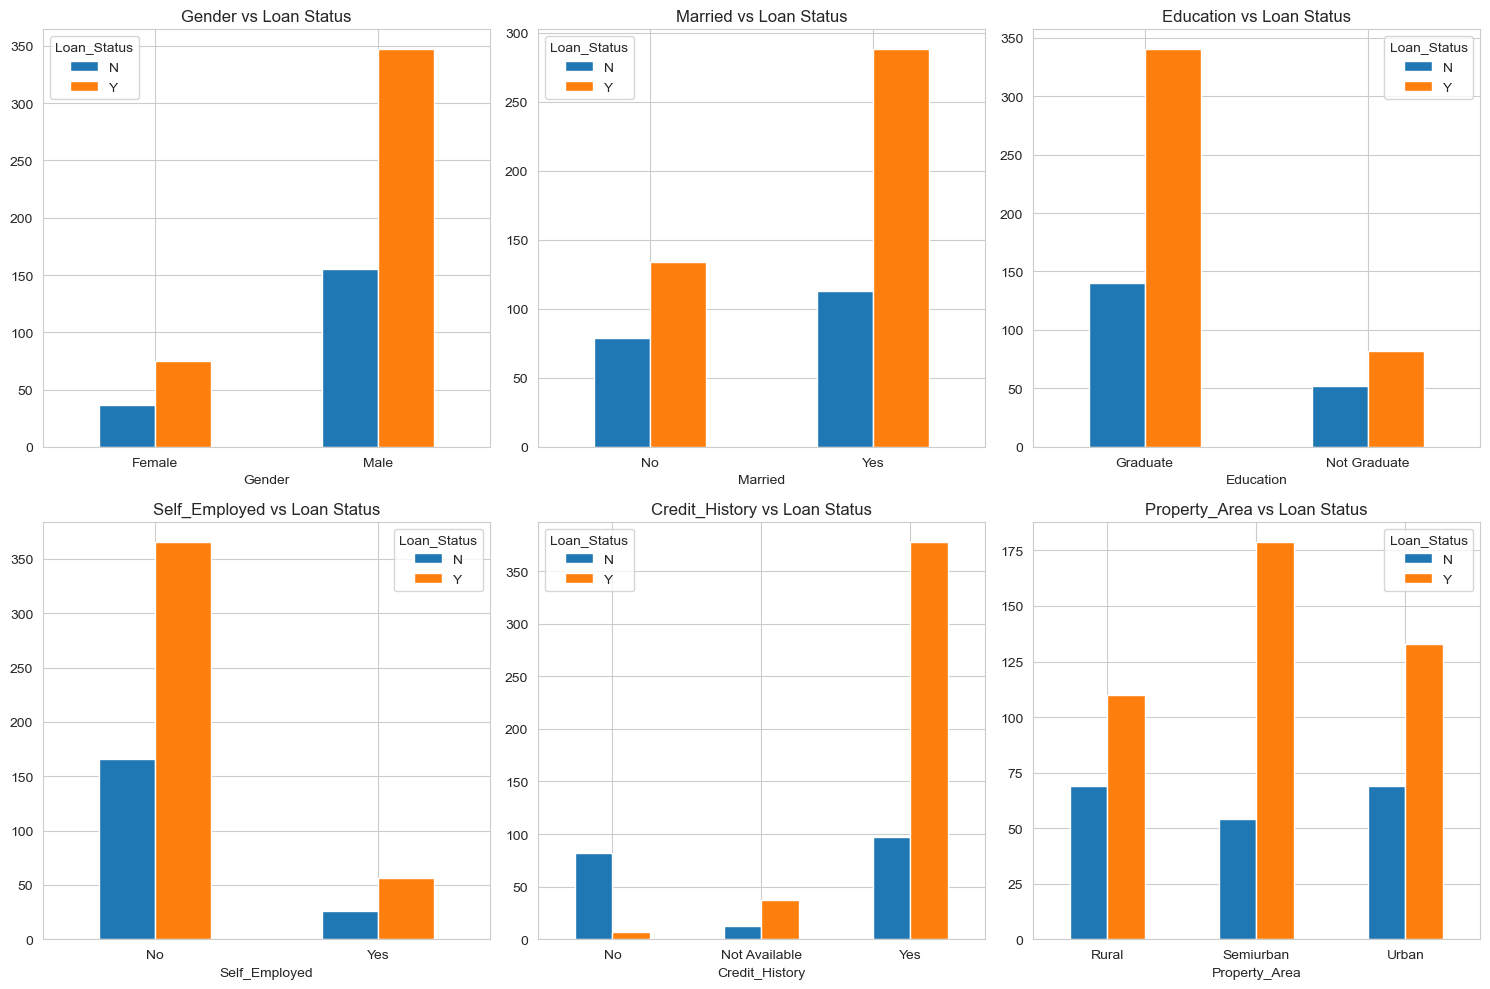

In [58]:
fig, axes = plt.subplots(2, 3, figsize= (15, 10))
category_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

for idx, col in enumerate(category_cols):
    ax = axes[idx//3, idx%3]
    pd.crosstab(df[col], df['Loan_Status']).plot(kind='bar', ax=ax)
    ax.set_title(f'{col} vs Loan Status')

    ax.tick_params(axis='x', labelrotation= 360)

plt.tight_layout()
plt.show()

#### Observation:
##### 1. Gender vs Loan Status:
Approval patterns for male and female applicants appear broadly similar. However, since the dataset contains significantly more male applicants, conclusions about gender-based approval differences should be interpreted cautiously. 

##### 2. Married vs Loan Status:
Married applicants show a higher number of approved loans compared to rejected ones. This may indicate a higher approval rate among married applicants, potentially due to greater financial stability or combined household income.

##### 3. Education vs Loan Status:
Graduate applicants exhibit a higher number of approved loans compared to non-graduates. This suggests a positive association between education level and loan approval outcomes.

##### 4. Employment vs Loan Status:
Both salaried and self-employed applicants show higher approval counts than rejections. However, salaried applicants dominate the dataset, which may influence overall approval trends.

##### 5. Credit History vs Loan Status:
Credit history shows a strong association with loan approval outcomes. Applicants with a positive credit history have a substantially higher approval rate, while applicants without a credit history experience more rejections. Applicants with unavailable credit history still show more approvals than rejections, but with higher uncertainty.

##### 6. Property Area vs Loan Status:
Applicants from semi-urban and urban areas show higher approval counts compared to rural applicants. This may reflect differences in economic stability, income opportunities, or risk profiles across regions.

***Overall, categorical variables such as credit history, marital status, education, and property area show meaningful associations with loan approval outcomes, with credit history emerging as the strongest influencing factor.***

### 5.2 Numerical Columns vs Loan Status

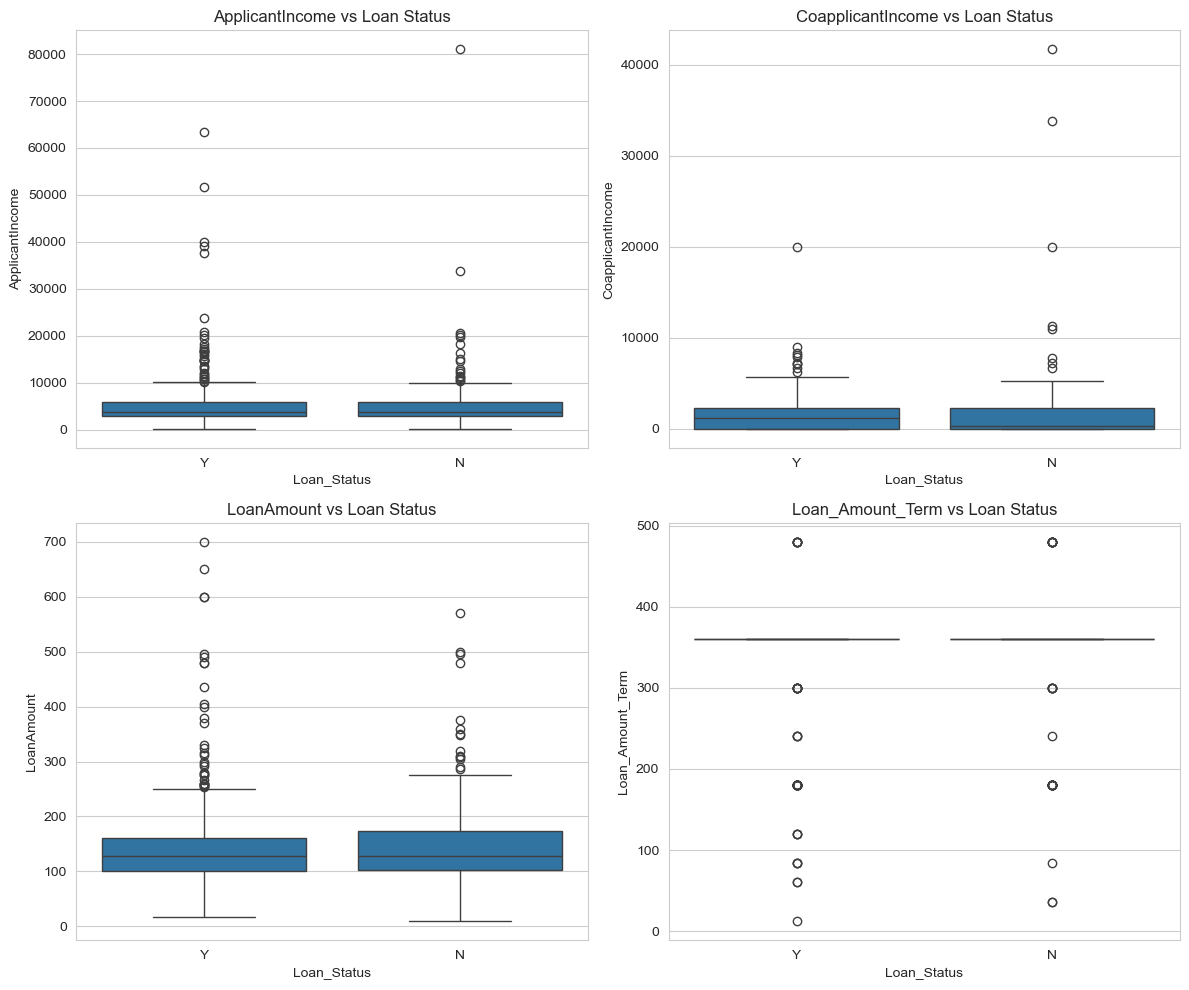

In [61]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx//2, idx%2]
    sns.boxplot(x= 'Loan_Status', y= col, data= df, ax=ax)
    ax.set_title(f'{col} vs Loan Status')

plt.tight_layout()
plt.show()

#### Observation:
##### Applicant Income vs Loan_Status:

The median applicant income for approved and rejected loans is similar, with substantial overlap. This indicates that applicant income alone is not a strong differentiator for loan approval decisions.

##### Coapplicant Income vs Loan_Status:

Co-applicant income shows significant overlap between approved and rejected loans. However, approved loans tend to have slightly higher co-applicant income in some cases, suggesting a secondary influence.

##### Loan Amount vs Loan_Status:

Rejected loans show slightly higher median loan amounts compared to approved loans. This suggests that higher loan amounts may be associated with increased rejection risk.

##### Loan Amount Term vs Loan_Status:

Loan term distributions for approved and rejected loans are nearly identical, indicating that loan tenure does not significantly influence approval decisions.

### 5.3 Applicant Income Vs Loan Amount vs Loan Status

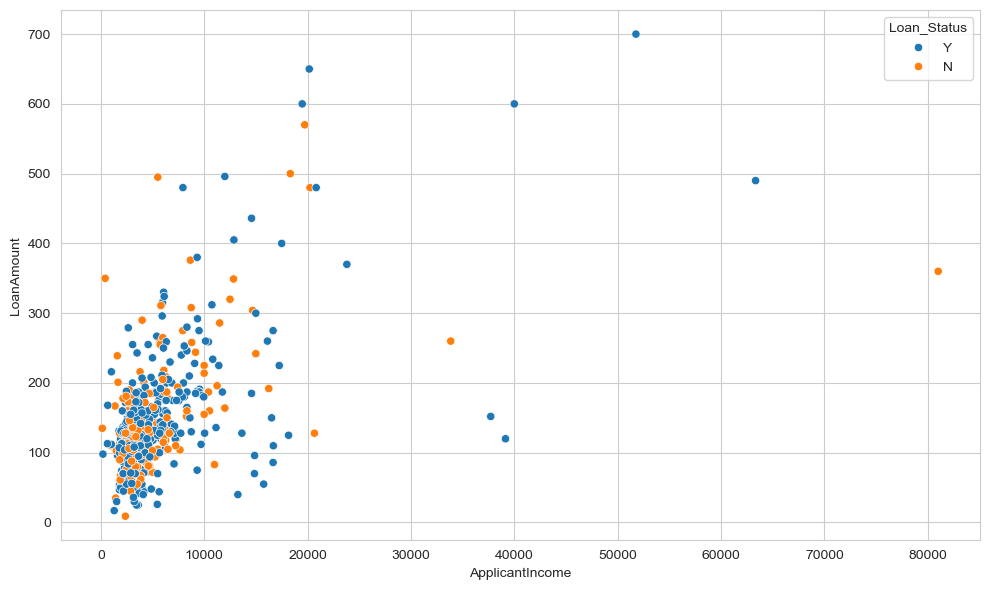

In [64]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)

plt.tight_layout()
plt.show()

#### Observation:
The scatter plot shows significant overlap between approved and rejected loans across applicant income and loan amount values. While higher loan amounts generally correspond to higher incomes, approval decisions are not strictly separated by income or loan amount alone. This indicates that additional factors, such as credit history play a more decisive role.

### 5.4 Approval Rate Analysis:

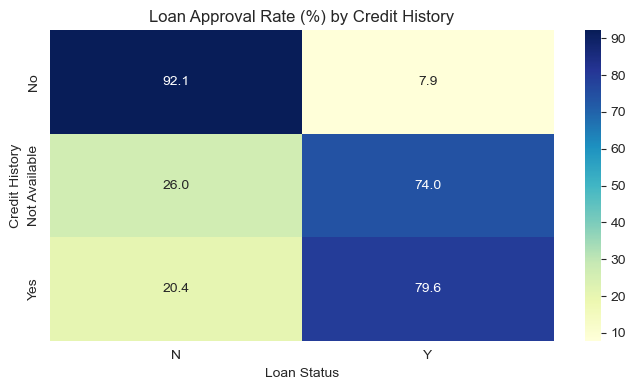

In [119]:
approval_rate = pd.crosstab(
    df['Credit_History'],
    df['Loan_Status'],
    normalize='index'
) * 100

plt.figure(figsize=(7,4))
sns.heatmap(
    approval_rate,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu"
)
plt.title("Loan Approval Rate (%) by Credit History")
plt.ylabel("Credit History")
plt.xlabel("Loan Status")
plt.tight_layout()
plt.show()

#### Observation:

The heatmap clearly highlights that applicants with no credit history have a very low approval rate, while applicants with positive or unavailable credit history exhibit similarly high approval rates. This reinforces credit history as a key risk differentiator.

### 5.5 Correlation Heatmap (Numerical Variables)

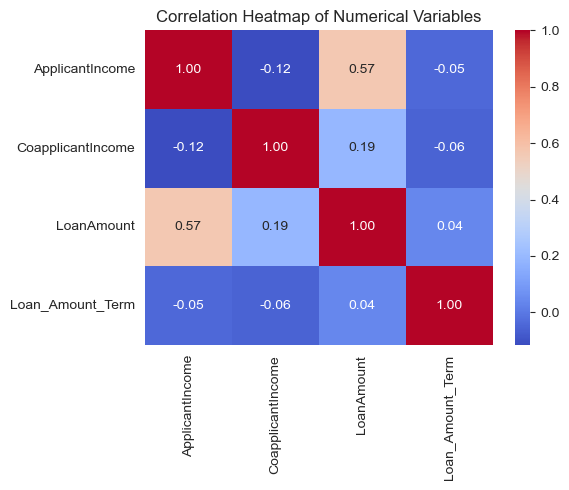

In [122]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(6,5))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.show()

#### Observation:
The correlation heatmap shows a moderate positive correlation between applicant income and loan amount, while other numerical variables exhibit weak correlations. This suggests limited multicollinearity among numeric features.

## Step 6: Key Insights, Business Recommendations and Limitations

### 6.1 Key Insights:

##### Insight 1: Credit History is the Strongest Approval Driver

Applicants with no credit history have a very low approval rate (~8%).

Applicants with positive credit history and unavailable credit history both show high and comparable approval rates (~75–80%).

This indicates that absence of credit history does not necessarily imply high risk, whereas a negative credit history is a strong rejection signal.

##### Insight 2: Income Alone Does Not Strongly Differentiate Approval

Applicant and co-applicant incomes show significant overlap between approved and rejected loans.

High income does not guarantee approval, and lower income does not automatically lead to rejection.

##### Insight 3: Higher Loan Amounts Carry Higher Rejection Risk

Rejected loans tend to have slightly higher median loan amounts.

Very large loan amounts appear more frequently among rejected applications.

##### Insight 4: Loan Tenure Has Minimal Impact on Approval

Loan amount term distributions for approved and rejected loans are nearly identical.

The 360-month tenure dominates approvals and rejections alike.

##### Insight 5: Demographic Factors Show Association, Not Causation

Higher approval counts are observed among:

• Married applicants

• Graduates

• Urban and semi-urban applicants

However, these variables are not decisive independently.

### 6.2 Business Recommendations

##### Recommendation 1: Refine Credit History Handling

Treat “No credit history” applicants as a high-risk segment.

Treat “Credit history not available” separately from negative credit history.

Introduce alternative risk signals (income stability, co-applicant strength) for such cases.

##### Recommendation 2: Use Composite Risk Assessment

Combine:

Credit history

Loan amount

Income (applicant + co-applicant)

Avoid decisions based on a single variable.

##### Recommendation 3: Monitor High Loan Amount Applications

Apply stricter scrutiny or additional verification for high loan amounts.

Consider tiered approval thresholds based on loan size.

##### Recommendation 4: Maintain Standard Loan Tenure Strategy

Since loan tenure shows little influence on approval, current standard tenure offerings appear appropriate.

Focus optimization efforts on risk variables instead.

### 6.3 Limitations of the Analysis

The dataset does not include:

• Repayment performance

• Defaults

• Interest rates

Conclusions are based on historical approval outcomes only.

Results represent associations, not causal relationships.

### 6.4 Conclusion

*“My analysis shows that credit history is the strongest driver of loan approval decisions. Applicants with no credit history face significantly lower approval rates, while income and loan tenure alone do not strongly differentiate approvals, emphasizing the need for composite risk evaluation.”*

***---- >>>>  Thank You ! <<<< ----***